In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,gender,year,taxable_income,tax_amount,income,location
0,Male,2023,40000,10000,50000,New York
1,male,2015,551912,57786,901912,non_city
2,male,2016,514972,52245,864972,non_city
3,male,2017,552304,57845,902304,non_city
4,male,2018,511611,51741,861611,non_city


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7078 entries, 0 to 7077
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          7078 non-null   object
 1   year            7078 non-null   int64 
 2   taxable_income  7078 non-null   int64 
 3   tax_amount      7078 non-null   int64 
 4   income          7078 non-null   int64 
 5   location        7078 non-null   object
dtypes: int64(4), object(2)
memory usage: 331.9+ KB


/tmp/ipykernel_13638/2626274964.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df, x='income', kde = True, bins= 15, palette='YlGnBu', ax= axes[0])
/tmp/ipykernel_13638/2626274964.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = df, x='income', hue='gender', ax= axes[1])


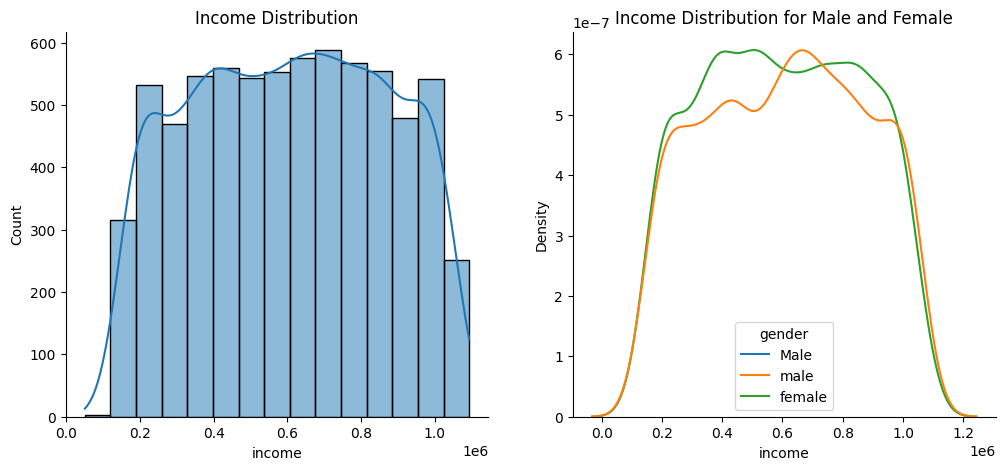

In [7]:
fig, axes = plt.subplots(1,2,figsize=(12,5), sharey= False)
sns.histplot(data = df, x='income', kde = True, bins= 15, palette='YlGnBu', ax= axes[0])
axes[0].set_title('Income Distribution')
sns.kdeplot(data = df, x='income', hue='gender', ax= axes[1])
axes[1].set_title('Income Distribution for Male and Female')
sns.despine(right=True, top=True)

Text(0.5, 1.0, 'Tax Distribution')

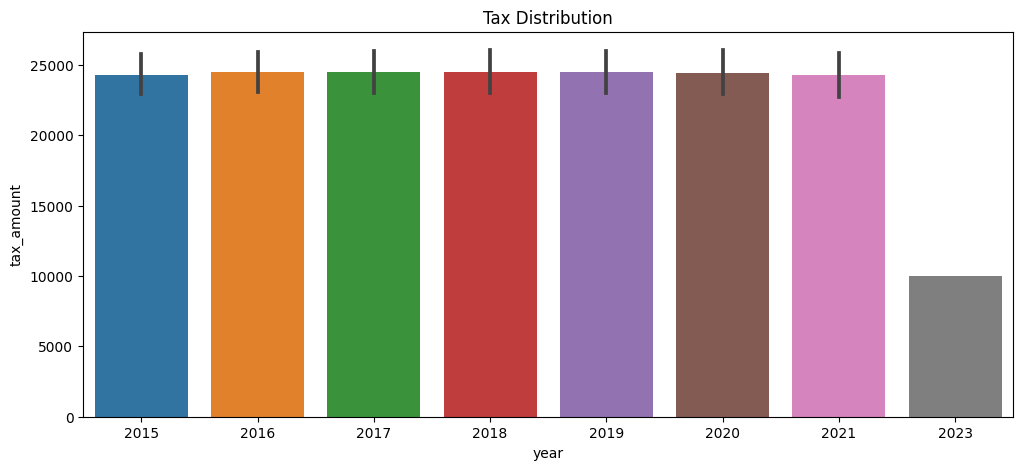

In [12]:
# year on x axis, sum of tax on y axis, bar plot
fig, axes = plt.subplots(1,1,figsize=(12,5), sharey= False)
sns.barplot(data = df, x='year', y='tax_amount', ax= axes)
axes.set_title('Year by year Tax Breakdown')

TypeError: 'AxesSubplot' object is not subscriptable

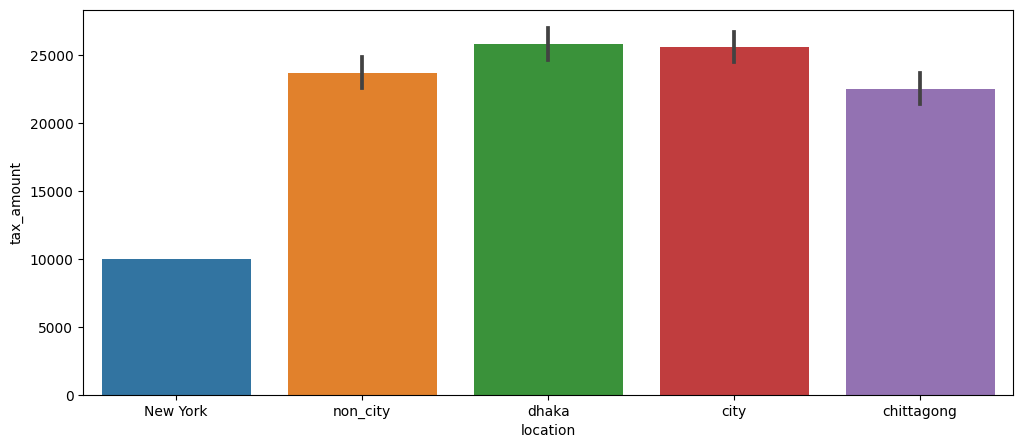

In [11]:
# year on x axis, sum of tax on y axis, bar plot
fig, axes = plt.subplots(1,1,figsize=(12,5), sharey= False)
sns.barplot(data = df, x='location', y='tax_amount', ax= axes)
axes[0].set_title('Tax Distribution')

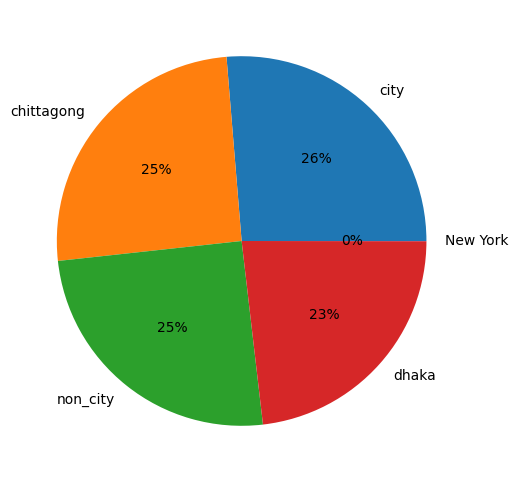

In [14]:
plt.figure(figsize=(6,6))
plt.pie(x=df['location'].value_counts(), labels= df['location'].value_counts().index , 
        autopct='%.0f%%')
plt.title('Percentage of Taxpayers from different Locations')
plt.show()